### Predict Customers' Behavior In Purchasing Decision

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

In [75]:
df = pd.read_csv("customer_behavior.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [77]:
# No Nan Data Found, Go ahead drop User ID column
df = df.drop("User ID", axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


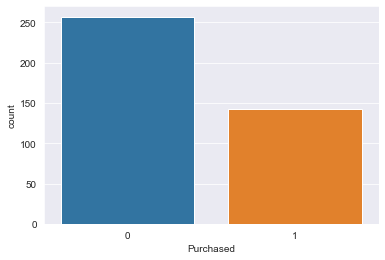

In [78]:
# Taking a look at the propotin of people make purchasing decision
sns.countplot(df["Purchased"])

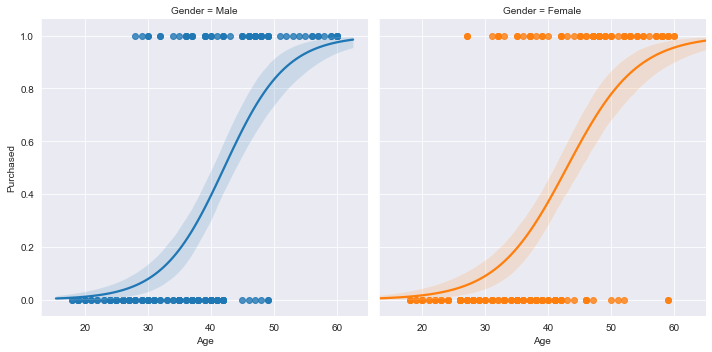

In [79]:
# People over 30 have better chance or buying, irrespective of their gender
sns.lmplot(x="Age", y="Purchased", col="Gender", hue="Gender", data=df, logistic=True)

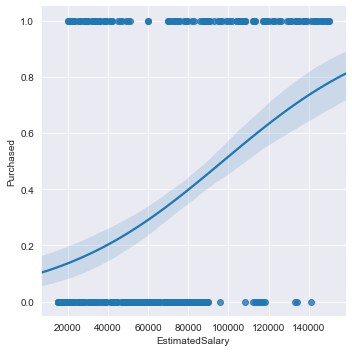

In [80]:
# wonder if income have a positive relation with purchasing decision?
sns.lmplot(x="EstimatedSalary", y="Purchased", data=df, logistic=True)

In [81]:
# which gender earns more on avg?
df.groupby("Gender").mean().drop("Purchased", axis=1)

,Age,EstimatedSalary
Gender,,
Female,38.411765,71759.803922
Male,36.867347,67642.857143


In [82]:
# transform categorical data into 0 & 1
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df["Gender"] = label.fit_transform(df["Gender"])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [83]:
X = df.drop('Purchased', axis = 1).values
Y = df['Purchased'].values

# scaling
# this is to convert all the data into values between 0 and 1 proportionally
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
X = Scaler.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(x_test)

C:\Users\wenhsian\Documents\Temp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
print("accuracy score is : ", accuracy_score(y_test, y_pred))

accuracy score is :  0.925
